In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [6]:
rs=123

In [7]:
dataset=pd.read_csv(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items_binary.csv")
dataset.tail(3)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
7636,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2,0
7637,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2,0
7638,120.0,4,0.5,0.0,0.0,0.0,0,55.0,23.0,2.0,13.0,0,2.0,0,0,0,4,0


In [8]:
dataset.isnull().sum()

Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
class                  0
dtype: int64

In [9]:
features_cols=list(dataset.iloc[:,:-1].columns)
features_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [10]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

In [11]:
y.value_counts(normalize=True)

class
0        0.870402
1        0.129598
Name: proportion, dtype: float64

<Axes: xlabel='class'>

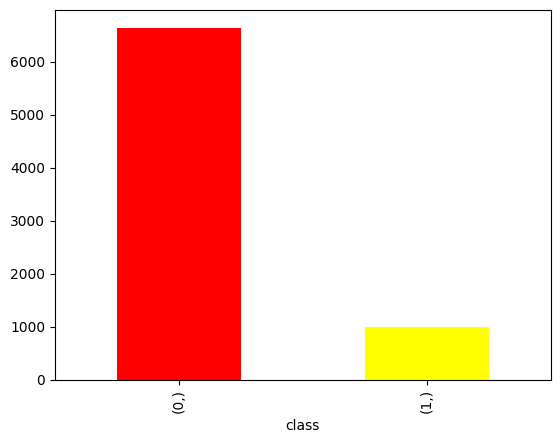

In [12]:
y.value_counts().plot.bar(color=["red","yellow"])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=rs)

In [14]:
from sklearn.svm import SVC
model=SVC()

In [15]:
model.fit(x_train,y_train.values.ravel())

SVC()

In [16]:
preds=model.predict(x_test)

In [17]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [18]:
evaluate_metrics(y_test,preds)

{'accuracy': 0.9568062827225131,
 'recall': np.float64(0.7727272727272727),
 'precision': np.float64(0.8793103448275862),
 'f1score': np.float64(0.8225806451612904)}

In [19]:
model=SVC(C=10,kernel="rbf")
model.fit(x_train,y_train.values.ravel())
preds=model.predict(x_test)
evaluate_metrics(y_test,preds)


{'accuracy': 0.9679319371727748,
 'recall': np.float64(0.8333333333333334),
 'precision': np.float64(0.9116022099447514),
 'f1score': np.float64(0.8707124010554089)}

In [29]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [30]:
model=SVC()

In [31]:
from sklearn.model_selection import GridSearchCV
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(x_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [32]:
best_params

{'C': 100, 'kernel': 'rbf'}

In [35]:
model=SVC(C=100,kernel="rbf")
model.fit(x_train,y_train.values.ravel())
preds=model.predict(x_test)
evaluate_metrics(y_test,preds)

{'accuracy': 0.9698952879581152,
 'recall': np.float64(0.8787878787878788),
 'precision': np.float64(0.8877551020408163),
 'f1score': np.float64(0.883248730964467)}

In [42]:
simplified_food_df=dataset[["Calories","Dietary Fiber","class"]]
x=simplified_food_df.iloc[:1000,:-1].values
y=simplified_food_df.iloc[:1000,-1:].values

In [43]:
under_sample=RandomUnderSampler(random_state=rs)
x_under,y_under=under_sample.fit_resample(x,y)

In [44]:
print(f"Dataset resampled shaped,X :{x_under.shape},y=:{y_under.shape}")

Dataset resampled shaped,X :(62, 2),y=:(62,)


In [46]:
scaler=MinMaxScaler()
x_under=scaler.fit_transform(x_under)

In [48]:
linear_svm=SVC(C=1000,kernel='linear')
linear_svm.fit(x_under,y_under)

SVC(C=1000, kernel='linear')

In [50]:
def plot_decision_boundry(X, y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

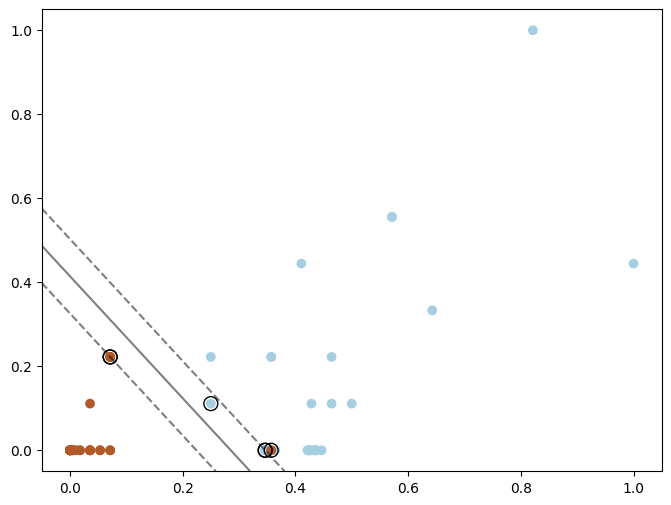

In [51]:
plot_decision_boundry(x_under, y_under, linear_svm)

In [52]:
svm_rbf_kernal=SVC(C=1000,kernel="rbf")
svm_rbf_kernal.fit(x_under,y_under)

SVC(C=1000)

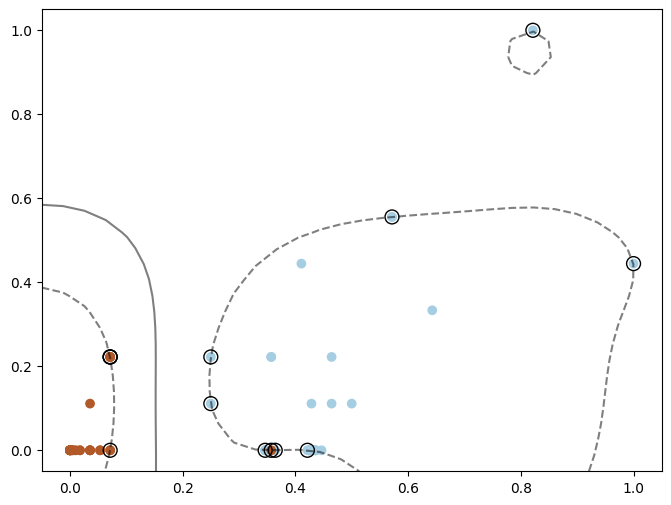

In [53]:
plot_decision_boundry(x_under,y_under,svm_rbf_kernal)

In [55]:
svm_poly_kernal=SVC(C=1000,kernel="poly")
svm_poly_kernal.fit(x_under,y_under)

SVC(C=1000, kernel='poly')

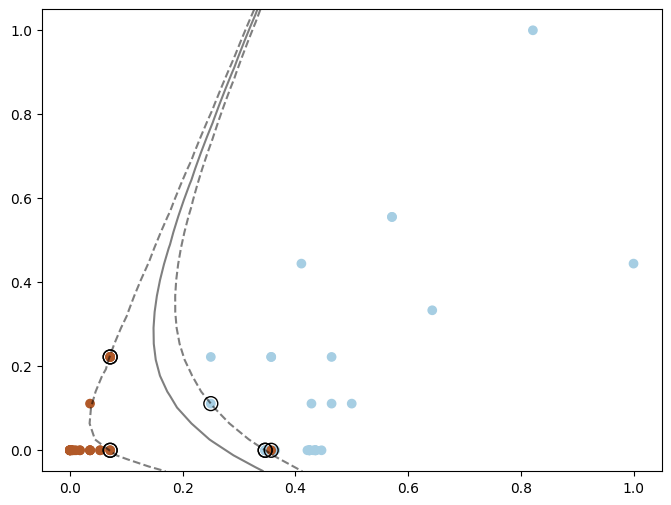

In [56]:
plot_decision_boundry(x_under,y_under,svm_poly_kernal)